#**1. SET-UP**

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/sample_data/MyDrive')

Mounted at /content/sample_data/MyDrive


In [3]:
import cv2
import imghdr
import os
import tensorflow as tf
import seaborn as sns
from matplotlib import pyplot as plt

In [4]:
data_dir = "/content/sample_data/MyDrive/MyDrive/classification/classifier"

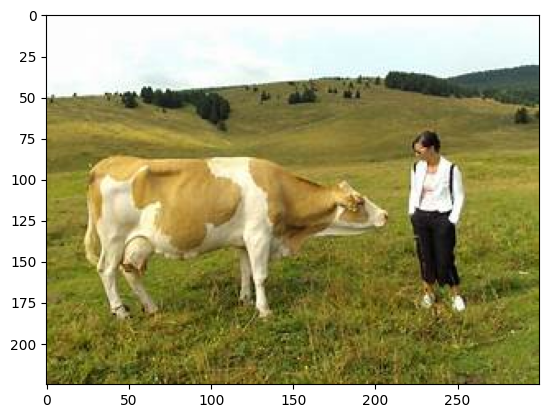

In [5]:
img = cv2.imread('/content/sample_data/MyDrive/MyDrive/classification/classifier/cow/OIP--FJF1fAEKYhaAYF7cVpHNgHaFj.jpeg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [6]:
os.listdir(data_dir)

['cow', 'horse', 'dog', 'cat', 'zebra', 'sheep']

In [7]:
img_exts = [ 'jpeg', 'png', 'bmp']

In [7]:
# for removing images with different extensions
for img_class in os.listdir(data_dir):
  for img in os.listdir(os.path.join (data_dir, img_class)):
    img_path = os.path.join(data_dir, img_class, img)
    try:
      image = cv2.imread(img_path)
      tip = imghdr.what(img_path)
      if tip not in img_exts:
        print("Image does not have required extension {}",format(img_path))
        os.remove(img_path)
    except Exception as e:
      print("Issue with image {}".format(img_path))

Image does not have required extension {} /content/sample_data/MyDrive/MyDrive/classification/classifier/dog/1200px-Labrador_Retriever_portrait.jpg
Image does not have required extension {} /content/sample_data/MyDrive/MyDrive/classification/classifier/dog/800px-French_Bulldog_with_puppies.jpg
Image does not have required extension {} /content/sample_data/MyDrive/MyDrive/classification/classifier/dog/crufts-carousel-image-2.jpg
Image does not have required extension {} /content/sample_data/MyDrive/MyDrive/classification/classifier/dog/beagle-hound-dog.jpg
Image does not have required extension {} /content/sample_data/MyDrive/MyDrive/classification/classifier/dog/GettyImages-654892254-e1689593598708.jpg
Image does not have required extension {} /content/sample_data/MyDrive/MyDrive/classification/classifier/dog/German-Shepherd-dog-Alsatian.jpg
Image does not have required extension {} /content/sample_data/MyDrive/MyDrive/classification/classifier/dog/mcm-website-distemper-banner-2-2880x9

In [ ]:
from pathlib import Path
image_extensions = [".png", ".jpg"]  # add there all your images file extensions

img_type_accepted_by_tf = ["bmp", "gif", "jpeg", "png"]
for filepath in Path(data_dir).rglob("*"):
    if filepath.suffix.lower() in image_extensions:
        img_type = imghdr.what(filepath)
        if img_type is None:
            print(f"{filepath} is not an image")
        elif img_type not in img_type_accepted_by_tf:
            print(f"{filepath} is a {img_type}, not accepted by TensorFlow")

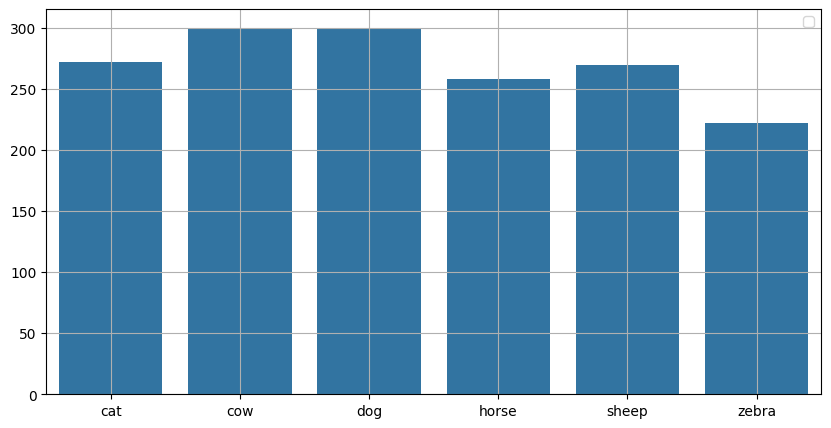

In [9]:
# for displaying no of images per class
class_names = sorted(os.listdir(data_dir))

num_classes = len(class_names)

class_sizes = []
for name in class_names:
    class_size = len(os.listdir(data_dir + "/" + name))
    class_sizes.append(class_size)

plt.figure(figsize=(10,5))
sns.barplot(x=class_names, y=class_sizes)
plt.grid()

plt.legend()

plt.show()

# **2. DATA LOADING**

In [10]:
dataset = tf.keras.utils.image_dataset_from_directory(data_dir, label_mode='categorical')

Found 1620 files belonging to 6 classes.


In [11]:
data_iterator = dataset.as_numpy_iterator()

In [12]:
batch = data_iterator.next()

In [13]:
len(batch)

2

In [14]:
batch[1]

array([[1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 1., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1.],
       [0.

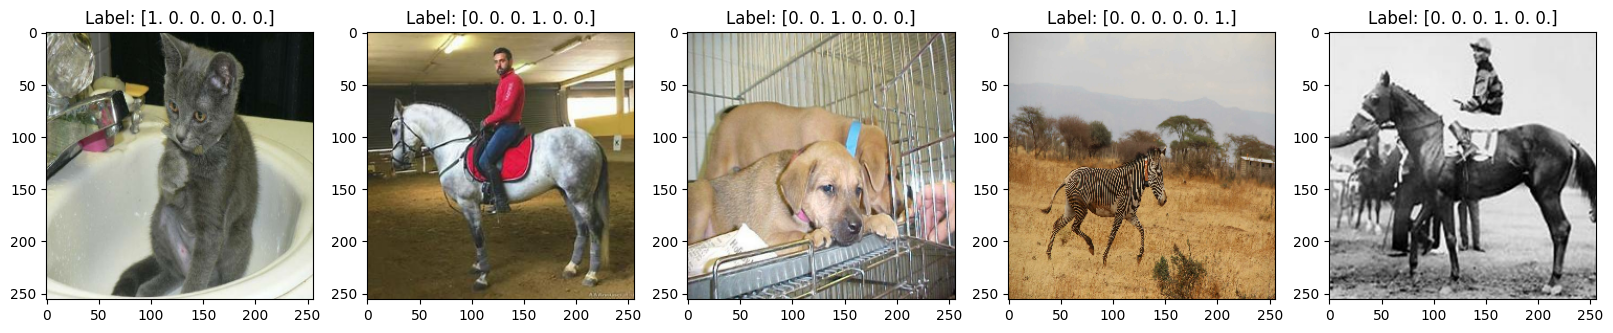

In [15]:
fig, ax = plt.subplots(ncols=5, figsize = (20,20))
for idx, img in enumerate (batch[0][:5]):
  ax[idx].imshow(img.astype(int))
  ax[idx].set_title(f'Label: {batch[1][idx]}')


# **3. DATA PRE-PROCESSING**

In [16]:
batch[0].shape

(32, 256, 256, 3)

In [17]:
batch[0].min()

0.0

In [18]:
# resizing the dataset
import tensorflow as tf

def resize_function(x, y):
    resized_x = tf.image.resize(x, (128, 128))

    return resized_x, y

# Apply the resize function to each element in the dataset
dataset = dataset.map(resize_function)


In [19]:
# Normalizing the dataset
dataset = dataset.map(lambda x,y : (x/255,y))

In [20]:
scaled_iterator = dataset.as_numpy_iterator()

In [21]:
scaled_batch = scaled_iterator.next()

In [22]:
scaled_batch[0].shape

(32, 128, 128, 3)

In [23]:
scaled_batch[0].max()

1.0

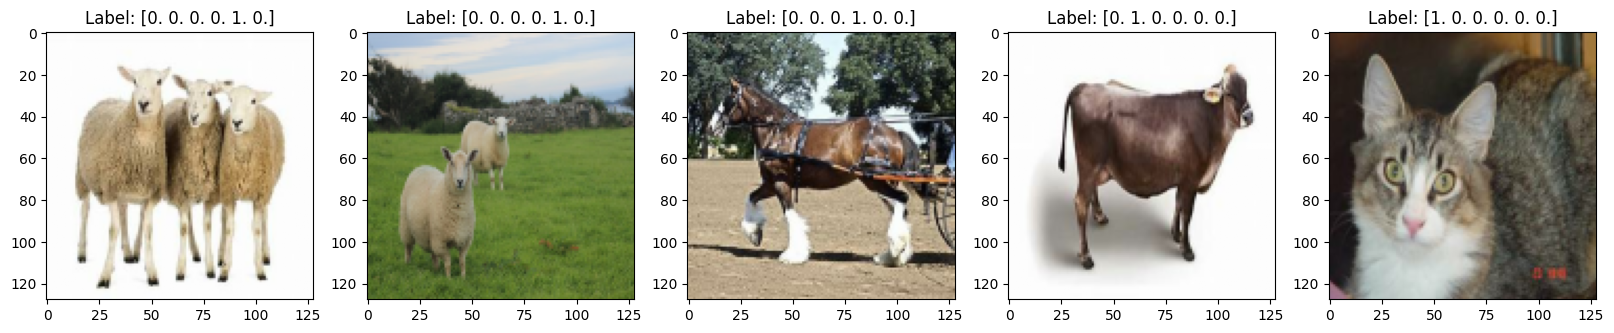

In [24]:
fig, ax = plt.subplots(ncols=5, figsize = (20,20))
for idx, img in enumerate (scaled_batch[0][:5]):
  ax[idx].imshow(img)
  ax[idx].set_title(f'Label: {scaled_batch[1][idx]}')


In [25]:
len(dataset)

51

Train/Test Split

In [26]:
train_size = int(len(dataset)*.75)+1
val_size = int(len(dataset)*.1)+1
test_size = int(len(dataset)*.1)+1

In [27]:
test_size+train_size+val_size

51

In [28]:
train_size

39

In [29]:
train_data = dataset.take(train_size)
val_data = dataset.skip(train_size).take(val_size)
test_data = dataset.skip(train_size+val_size).take(test_size)

In [30]:
def extract_features_labels(image, label):
    return image, label

x_train, y_train = zip(*train_data.map(extract_features_labels))
x_val, y_val = zip(*val_data.map(extract_features_labels))
x_test, y_test = zip(*test_data.map(extract_features_labels))

In [31]:
x_train = tf.concat(x_train, axis=0).numpy()
y_train = tf.concat(y_train, axis=0).numpy()
x_val = tf.concat(x_val, axis=0).numpy()
y_val = tf.concat(y_val, axis=0).numpy()
x_test = tf.concat(x_test, axis=0).numpy()
y_test = tf.concat(y_test, axis=0).numpy()

In [32]:
print(y_train.shape)
print(x_train.shape)
print(y_val.shape)
print(x_val.shape)
print(y_test.shape)
print(x_test.shape)

(1248, 6)
(1248, 128, 128, 3)
(192, 6)
(192, 128, 128, 3)
(180, 6)
(180, 128, 128, 3)


# **4. MODEL DEVELOPMENT**

In [33]:
import numpy as np
from tensorflow.keras.applications.vgg16 import VGG16
import tensorflow.keras as k
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import optimizers
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, LearningRateScheduler
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.metrics import accuracy_score


In [34]:
vgg16_model = VGG16(weights='imagenet',
                    include_top=False,
                    classes=6,
                    input_shape=(128,128,3)# input: 32x32 images with 3 channels -> (32, 32, 3) tensors.
                   )

58889256/58889256 [==============================] - 0s 0us/step


In [35]:
model = Sequential()
for layer in vgg16_model.layers:
    model.add(layer)


In [36]:

from tensorflow.keras.layers import Dense, Flatten, Dropout
model.add(Flatten())
model.add(Dense(512, activation='relu', name='hidden1'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu', name='hidden2'))
model.add(Dropout(0.4))
model.add(Dense(6, activation='softmax', name='predictions'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 block1_conv1 (Conv2D)       (None, 128, 128, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 128, 128, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 64, 64, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 64, 64, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 64, 64, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 32, 32, 128)       0         
                                                                 
 block3_conv1 (Conv2D)       (None, 32, 32, 256)       2

In [37]:
sgd = optimizers.SGD(learning_rate=0.001, momentum=0.9)
model.compile(loss='categorical_crossentropy',optimizer= sgd,metrics=['accuracy'])

In [38]:
def lr_scheduler(epoch):
    return 0.001 * (0.5 ** (epoch // 20))
reduce_lr = LearningRateScheduler(lr_scheduler)

mc = ModelCheckpoint('./weights.h5', monitor='val_accuracy', save_best_only=True, mode='max')

# **5. TRAINING**

In [39]:
# initialize the number of epochs and batch size
EPOCHS = 30
BS = 32

# train the model
history = model.fit(
    x_train,y_train, batch_size=BS,
    validation_data=(x_val,y_val),
    steps_per_epoch=len(x_train) // BS,
    epochs=EPOCHS,
    callbacks=[reduce_lr,mc])

Epoch 1/30
39/39 [==============================] - ETA: 0s - loss: 1.7104 - accuracy: 0.2981

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


39/39 [==============================] - 21s 172ms/step - loss: 1.7104 - accuracy: 0.2981 - val_loss: 1.1415 - val_accuracy: 0.5469 - lr: 0.0010
Epoch 2/30
39/39 [==============================] - 6s 167ms/step - loss: 1.0871 - accuracy: 0.5537 - val_loss: 0.8205 - val_accuracy: 0.6719 - lr: 0.0010
Epoch 3/30
39/39 [==============================] - 6s 167ms/step - loss: 0.7928 - accuracy: 0.6995 - val_loss: 0.5562 - val_accuracy: 0.8385 - lr: 0.0010
Epoch 4/30
39/39 [==============================] - 6s 163ms/step - loss: 0.5624 - accuracy: 0.7909 - val_loss: 0.4684 - val_accuracy: 0.8438 - lr: 0.0010
Epoch 5/30
39/39 [==============================] - 6s 154ms/step - loss: 0.3813 - accuracy: 0.8670 - val_loss: 0.4957 - val_accuracy: 0.8438 - lr: 0.0010
Epoch 6/30
39/39 [==============================] - 6s 162ms/step - loss: 0.3017 - accuracy: 0.8846 - val_loss: 0.4306 - val_accuracy: 0.8490 - lr: 0.0010
Epoch 7/30
39/39 [==============================] - 6s 150ms/step - loss: 0.1979

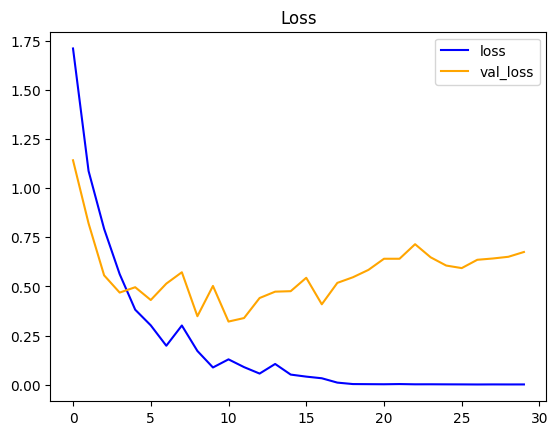

In [40]:
from matplotlib import pyplot as plt
fig = plt.figure()
plt.plot(history.history['loss'], color= 'blue', label = 'loss')
plt.plot(history.history['val_loss'], color = 'orange', label = 'val_loss')
plt.title('Loss')
plt.legend(loc = 'upper right')
plt.show()

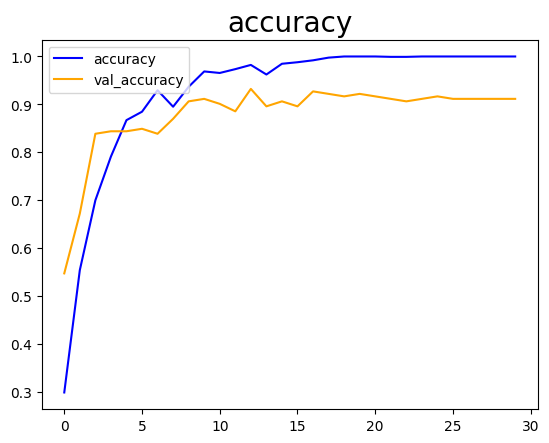

In [41]:
fig = plt.figure()
plt.plot(history.history['accuracy'], color= 'blue', label = 'accuracy')
plt.plot(history.history['val_accuracy'], color = 'orange', label = 'val_accuracy')
plt.title('accuracy', fontsize = 20)
plt.legend(loc = 'upper left')
plt.show()

# **6. TESTING**

In [42]:
from tensorflow.keras.metrics import Precision, Recall, CategoricalAccuracy

In [43]:
precision = Precision()
recall = Recall()
accuracy = CategoricalAccuracy()

In [51]:
yhat = model.predict(x_test)
precision.update_state(y_test,yhat)
recall.update_state(y_test,yhat)
accuracy.update_state(y_test,yhat)


6/6 [==============================] - 0s 52ms/step


In [54]:
print("Precision: {} " .format(precision.result()))
print("Recall: {} " .format(recall.result()))
print("Accuracy: {} " .format(accuracy.result()))


Precision: 0.9277777671813965 
Recall: 0.9259259104728699 
Accuracy: 0.9277777671813965 


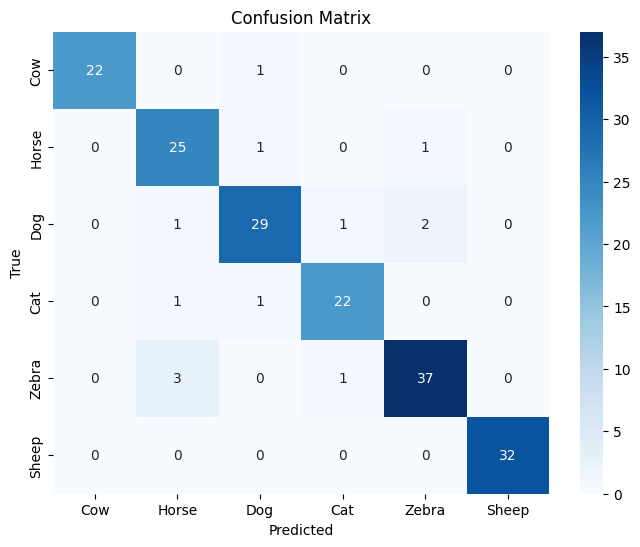

In [57]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
y_true = np.argmax(y_test, axis=1)
y_pred = np.argmax(yhat, axis=1)

cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Cow', 'Horse', 'Dog', 'Cat', 'Zebra', 'Sheep'], yticklabels=['Cow', 'Horse', 'Dog', 'Cat', 'Zebra', 'Sheep'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [58]:
def Prediction(predictions):
    if np.array_equal(predictions, np.array([[1, 0, 0, 0, 0, 0]])):
        return "cat"
    elif np.array_equal(predictions, np.array([[0, 1, 0, 0, 0, 0]])):
        return "cow"
    elif np.array_equal(predictions, np.array([[0, 0, 1, 0, 0, 0]])):
        return "dog"
    elif np.array_equal(predictions, np.array([[0, 0, 0, 1, 0, 0]])):
        return "horse"
    elif np.array_equal(predictions, np.array([[0, 0, 0, 0, 1, 0]])):
        return "sheep"
    elif np.array_equal(predictions, np.array([[0, 0, 0, 0, 0, 1]])):
        return "zebra"
    else:
        return "Unidentified"


1/1 [==============================] - 1s 1s/step
dog


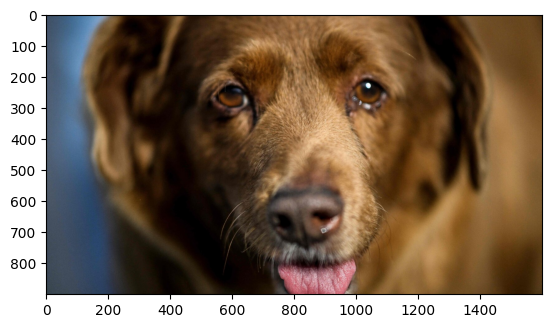

In [60]:
test = cv2.imread("/content/sample_data/MyDrive/MyDrive/classification/classifier/dog/16xp-dog-01-lchw-videoSixteenByNineJumbo1600.jpg")
plt.imshow(cv2.cvtColor(test, cv2.COLOR_BGR2RGB))
resize = tf.image.resize(test, (128,128))
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat = np.round(yhat)
print(Prediction(yhat))

1/1 [==============================] - 0s 29ms/step
cat


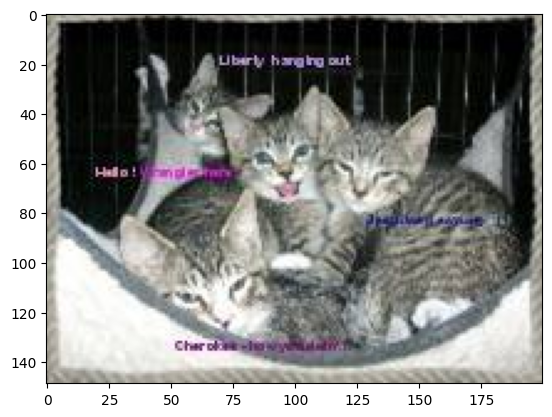

In [61]:
test = cv2.imread("/content/sample_data/MyDrive/MyDrive/classification/classifier/cat/cats_00049.jpg")
plt.imshow(cv2.cvtColor(test, cv2.COLOR_BGR2RGB))
resize = tf.image.resize(test, (128,128))
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat = np.round(yhat)
print(Prediction(yhat))

1/1 [==============================] - 0s 34ms/step
horse


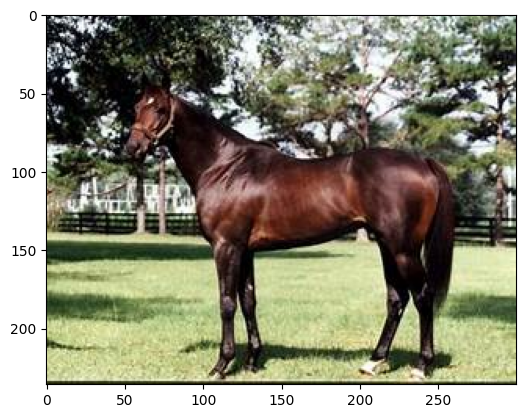

In [62]:
test = cv2.imread("/content/sample_data/MyDrive/MyDrive/classification/classifier/horse/OIP-B6aWVOWrKIkxsVIrU0iJGQHaF0.jpeg")
plt.imshow(cv2.cvtColor(test, cv2.COLOR_BGR2RGB))
resize = tf.image.resize(test, (128,128))
yhat = model.predict(np.expand_dims(resize/255, 0))
yhat = np.round(yhat)
print(Prediction(yhat))

# **7.Saving the Model**

In [63]:
model_dir = "/content/sample_data/MyDrive/MyDrive/classification/model"

In [64]:
model.save(os.path.join(model_dir, 'classifier_VGG16.h5'))

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


The model trained on VGG16 gives accuraccy of 92.77%